# EXPLORATORY ANALYSIS OF DATA

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split
import seaborn as sns

In [87]:
data = pd.read_csv('FIFA18 - Ultimate Team players.csv')

In [88]:
data.head()

,player_ID,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,rf,lf,rw,lw,st,price_ps4,price_xbox,price_pc,traits,specialties
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,98,Icons,Icons,Brazil,...,96.0,96.0,96.0,96.0,95.0,3490000.0,3141000.0,NaN,"Leadership, Shooting - Finesse Shot, Playmaker...","Speedster, Aerial Threat, Dribbler, Play Maker..."
1,2,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,97,Icons,Icons,Argentina,...,94.0,94.0,94.0,94.0,90.0,3800000.0,2418000.0,NaN,"Avoids Using Weaker Foot, Shooting - Finesse S...","Speedster, Dribbler, Play Maker, Distance Shoo..."
2,3,Ronaldo,Ronaldo Luís Nazário de Lima,Gold - Rare,Icon,NaN,96,Icons,Icons,Brazil,...,94.0,94.0,92.0,92.0,94.0,4499000.0,4200000.0,NaN,"Tries To Beat Defensive Line, Shooting - Fines...","Speedster, Dribbler, Distance Shooter, FK Spec..."
3,4,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,95,Icons,Icons,Brazil,...,94.0,94.0,94.0,94.0,92.0,1770000.0,2099000.0,NaN,"Shooting - Finesse Shot, Technical Dribbler","Speedster, Dribbler, Distance Shooter, Crosser..."
4,5,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,95,Icons,Icons,Argentina,...,92.0,92.0,92.0,92.0,88.0,1100000.0,1369000.0,NaN,"Avoids Using Weaker Foot, Shooting - Finesse S...","Dribbler, Play Maker, Distance Shooter, Crosse..."


In [89]:
data.describe()

,player_ID,overall,age,height,weight,intl_rep,pace,pace_acceleration,pace_sprint_speed,dribbling,...,cam,cf,rf,lf,rw,lw,st,price_ps4,price_xbox,price_pc
count,21561.000000,21561.000000,21561.000000,21561.000000,21561.000000,21561.00000,19379.000000,21534.000000,21534.000000,19379.000000,...,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,2.062900e+04,1.943700e+04,1.926600e+04
mean,10795.027086,68.897732,26.682853,181.401976,75.510134,1.25240,69.897002,66.876196,67.112427,65.024872,...,62.239446,62.053377,62.053377,62.053377,62.288947,62.288947,61.160802,1.208804e+04,1.095545e+04,8.837730e+03
std,6243.418732,8.557319,4.744557,6.767347,7.066488,0.64381,11.970813,15.027611,14.696633,11.579942,...,11.490885,11.621129,11.621129,11.621129,11.565302,11.565302,10.986715,1.087399e+05,9.862286e+04,8.752765e+04
min,1.000000,46.000000,17.000000,155.000000,49.000000,0.00000,21.000000,11.000000,11.000000,25.000000,...,28.000000,27.000000,27.000000,27.000000,26.000000,26.000000,31.000000,2.000000e+02,2.000000e+02,2.000000e+02
25%,5391.000000,63.000000,23.000000,177.000000,70.000000,1.00000,63.000000,59.000000,59.000000,58.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,54.000000,2.000000e+02,3.000000e+02,2.500000e+02
50%,10781.000000,68.000000,26.000000,181.000000,75.000000,1.00000,71.000000,69.000000,69.000000,65.000000,...,63.000000,62.000000,62.000000,62.000000,63.000000,63.000000,61.000000,5.500000e+02,8.000000e+02,6.500000e+02
75%,16192.000000,74.000000,30.000000,186.000000,80.000000,1.00000,78.000000,77.000000,77.000000,72.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,68.000000,1.600000e+03,2.400000e+03,1.600000e+03
max,21636.000000,99.000000,88.000000,205.000000,110.000000,5.00000,99.000000,99.000000,99.000000,99.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,4.717000e+06,4.200000e+06,3.850000e+06


In [90]:
data.columns

Index(['player_ID', 'player_name', 'player_extended_name', 'quality',
       'revision', 'origin', 'overall', 'club', 'league', 'nationality',
       'position', 'age', 'date_of_birth', 'height', 'weight', 'intl_rep',
       'added_date', 'pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning', 'pref_foot', 'att_w

## 10 most common nationalities of the players

In [91]:
minidata = data.nationality.value_counts()
countries = minidata[:10]
countries

England      2188
Germany      1430
Spain        1314
France       1244
Argentina     996
Italy         969
Colombia      784
Brazil        760
Holland       549
Japan         544
Name: nationality, dtype: int64

## Reputation of players from these 10 countries. 

In [92]:
data.intl_rep = data.intl_rep.astype(object)
repdata = data.loc[data.nationality.isin(countries.index),("intl_rep","nationality")]
reptable = pd.DataFrame(pd.crosstab(repdata.intl_rep, repdata.nationality,
                                    colnames = ['Countries'], rownames = ['International Reputation']))
print(reptable)

reptable.apply(lambda r: r/r.sum(), axis=1)# Proportion of each country within each rank


Countries                 Argentina  Brazil  Colombia  England  France  \
International Reputation                                                 
0                                 6       6         9        6      10   
1                               797     482       715     1971     833   
2                               109     141        42      134     244   
3                                48      99        12       71     113   
4                                26      15         6        6      40   
5                                10      17         0        0       4   

Countries                 Germany  Holland  Italy  Japan  Spain  
International Reputation                                         
0                               4        3      2      0     26  
1                            1134      408    698    506    950  
2                             202       73    195     30    189  
3                              55       41     50      8    108  
4          

Countries,Argentina,Brazil,Colombia,England,France,Germany,Holland,Italy,Japan,Spain
International Reputation,,,,,,,,,,
0,0.083333,0.083333,0.125000,0.083333,0.138889,0.055556,0.041667,0.027778,0.000000,0.361111
1,0.093831,0.056746,0.084177,0.232046,0.098069,0.133506,0.048034,0.082176,0.059571,0.111844
2,0.080206,0.103753,0.030905,0.098602,0.179544,0.148639,0.053716,0.143488,0.022075,0.139073
3,0.079339,0.163636,0.019835,0.117355,0.186777,0.090909,0.067769,0.082645,0.013223,0.178512
4,0.120370,0.069444,0.027778,0.027778,0.185185,0.157407,0.111111,0.111111,0.000000,0.189815
5,0.312500,0.531250,0.000000,0.000000,0.125000,0.031250,0.000000,0.000000,0.000000,0.000000


In [93]:
reptable.apply(lambda r: r/r.sum(), axis=0)# Proportion of each rank within each country

Countries,Argentina,Brazil,Colombia,England,France,Germany,Holland,Italy,Japan,Spain
International Reputation,,,,,,,,,,
0,0.006024,0.007895,0.011480,0.002742,0.008039,0.002797,0.005464,0.002064,0.000000,0.019787
1,0.800201,0.634211,0.911990,0.900823,0.669614,0.793007,0.743169,0.720330,0.930147,0.722983
2,0.109438,0.185526,0.053571,0.061243,0.196141,0.141259,0.132969,0.201238,0.055147,0.143836
3,0.048193,0.130263,0.015306,0.032450,0.090836,0.038462,0.074681,0.051600,0.014706,0.082192
4,0.026104,0.019737,0.007653,0.002742,0.032154,0.023776,0.043716,0.024768,0.000000,0.031202
5,0.010040,0.022368,0.000000,0.000000,0.003215,0.000699,0.000000,0.000000,0.000000,0.000000


### Comment: 
* From the first table, we see that the number of highest reputated players is not distributed evenly among these 10 countries, Argentia accounts for 31.25%, Brazil 53.13%, France 12.5%, Germany 3.13%, and the other countries have none.
* As shown in the second table, though have the most players in the dataset, more than 90% of the players from Columbia, English, and Japan are in reputation 1. 
* The number of players does not necessarily reflect the international reputation of players from that country.


## Proportion of these 10 countries in Gold and Silver Quality Compared to other countries

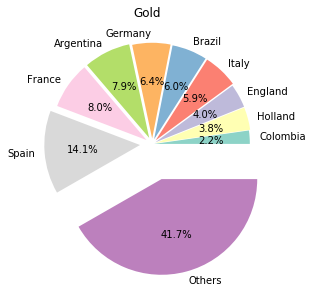

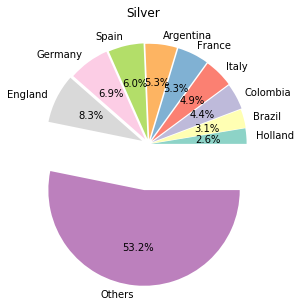

In [94]:
#piedata = data.loc[data.nationality.isin(['Argentina','Brazil','Colombia','England','France',
                                      #'Germany','Holland','Italy','Spain']),['nationality','quality']]
#piedata.set_index('nationality')
piedata = data[['nationality','quality']].copy()
nationality = data['nationality'].copy()
for i in range(len(nationality)):
    if (nationality[i] in ['Argentina','Brazil','Colombia','England','France',
                          'Germany','Holland','Italy','Spain']) == False:
        nationality[i]= 'Others'
nationality = pd.DataFrame({'Nationality':nationality})
piedata = pd.concat([piedata, nationality], axis = 1)
piedata.drop('nationality', axis = 1)
piedata = pd.DataFrame(pd.crosstab(piedata.Nationality, piedata.quality,
                                    colnames = ['Quality'], rownames = ['Countries']))
piedata = piedata.apply(lambda r: r/r.sum(), axis=0)

from matplotlib import cm
for i in ['Gold','Silver']:
    label = piedata[i].sort_values().index
    count = piedata[i].sort_values()
    source_pie = plt.pie(count, labels=label, autopct='%1.1f%%',
                         colors= cm.Set3(np.arange(10)),
                         radius =1.1,
                         explode = count)
    plt.suptitle(i)
    plt.show()


### Comment:
* These 10 countries account for more than half of the Gold quality players, and almost half of the Silver quality players.

## Nationalities of top 100 players (using overall for ranking)

Text(0, 0.5, 'Nationality')

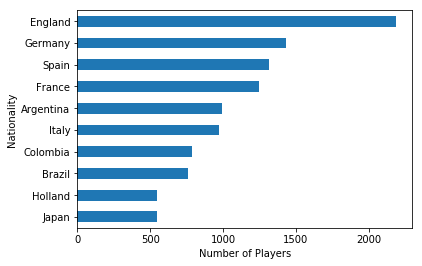

In [95]:
data = pd.read_csv('FIFA18 - Ultimate Team players.csv')
top10 = data.sort_values(by = 'overall', ascending = False)
top10 = pd.DataFrame(top10['nationality'].value_counts())
top10.columns = ['Number of Players']
top10 = top10.iloc[0:10].sort_values('Number of Players')
top10.plot.barh(legend = False)
plt.xlabel('Number of Players')
plt.ylabel('Nationality')

## Histogram of Player's Age

(array([1.370e+02, 4.690e+02, 2.289e+03, 1.439e+03, 3.288e+03, 1.884e+03,
        1.760e+03, 3.264e+03, 1.344e+03, 2.470e+03, 8.720e+02, 1.242e+03,
        3.700e+02, 2.460e+02, 2.740e+02, 5.300e+01, 5.100e+01, 1.700e+01,
        7.000e+00, 2.100e+01, 3.000e+00, 1.500e+01, 7.000e+00, 6.000e+00,
        3.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([17.  , 18.42, 19.84, 21.26, 22.68, 24.1 , 25.52, 26.94, 28.36,
        29.78, 31.2 , 32.62, 34.04, 35.46, 36.88, 38.3 , 39.72, 41.14,
        42.56, 43.98, 45.4 , 46.82, 48.24, 49.66, 51.08, 52.5 , 53.92,
        55.34, 56.76, 58.18, 59.6 , 61.02, 62.44, 63.86, 65.28, 66.7 ,
        68.12, 69.54, 70.96, 72.38, 73.8 , 75.22, 76.64, 78.06, 79.48,
        80.9 , 82.32,

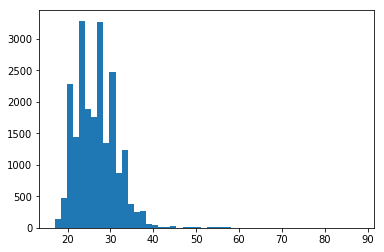

In [96]:
plt.hist(data['age'], bins = 50)

### Comment:


# Relationship between Age and Overall Rating

       overall
age           
17   71.500000
18   57.681481
19   59.388060
20   59.828415
21   63.085153
22   65.305768
23   66.712753
24   68.002347


,age,count
0,17,2
1,18,135
2,19,469
3,20,915
4,21,1374


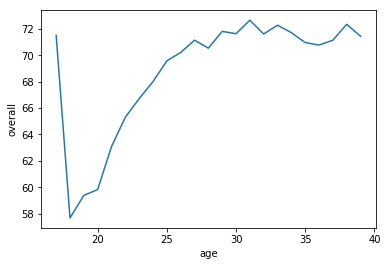

In [101]:
agedata = data[['age','overall']].groupby('age').mean()
agedata = agedata[agedata.index < 40]
myplot = sns.lineplot(x =agedata.index , y = 'overall',data = agedata)
print(agedata[agedata.index < 25])
agesummary = data['age'].value_counts().reset_index()
agesummary.columns = ['age','count']
agesummary.sort_values(by = 'age').reset_index().drop('index', axis = 1)[:5]

### Comment: 
* We only look at the data of players under 40 years old because most players will retire by that age.
* We can see that there is a critical drop in average overall rating when age changes from 17 to 18, then it steadily increases after 18. This is because there are only 2 player cards associated with age 17, so the mean is (67+76)/2; and among players at age 18, the highest rating is 87 while the majority of rating is at around 50 and thus, the mean drops significantly from 17 to 18

## 10 clubs that have youngest players

In [79]:
meanAgeInClub = data.groupby(['club'])['age'].mean()

meanAgeInClub = meanAgeInClub.rename_axis(('club')).reset_index(name='Mean Age').sort_values('Mean Age')
meanAgeInClub.head(10).reset_index(drop=True)

,club,Mean Age
0,Atlético Mineiro,21.000000
1,Sevilla Atlético,21.037037
2,FC Barcelona “B”,21.526316
3,São Paulo,22.000000
4,Santos,22.000000
5,SW Werder Bremen II,22.678571
6,Ajax,22.769231
7,Walsall,22.771429
8,Galway United,23.115385
9,Royal Excel Mouscron,23.333333


## The most expensive players on PS4 platform

In [14]:
print(np.max(data.price_ps4))
print(data[data.price_ps4 == np.max(data.price_ps4)].player_extended_name)

4717000.0
18990    C. Ronaldo dos Santos Aveiro
Name: player_extended_name, dtype: object


## Does preferred foot affect overall rating?

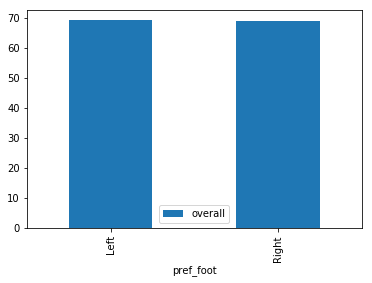

In [80]:
data[['pref_foot','overall']].groupby('pref_foot').mean().plot.bar()

### Comment:
* The plot suggests that the overall rating is similar for players who prefer using left leg and those who prefer using right leg. We should not include this variable in the model.

## Does preferred position affect overall rating?

Text(0, 0.5, 'Position')

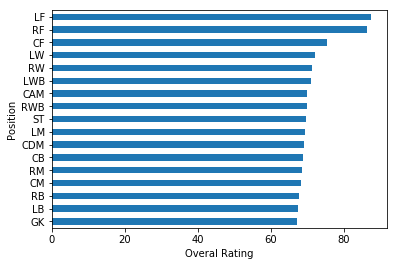

In [51]:
positiontable = data[['position','overall']].groupby('position').mean().sort_values(by ='overall')
positiontable.plot.barh(legend = False)
plt.xlabel('Overal Rating')
plt.ylabel('Position')

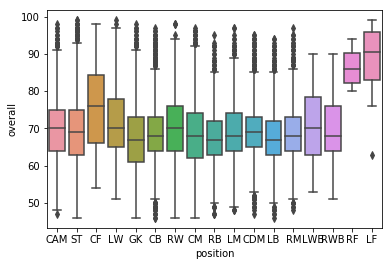

In [83]:
sns.boxplot(x="position", y="overall", data=data)

### Comment:
* The plot suggests that the overall rating is similar any position except just for left and right forward. We should not include this variable in the model.

## Do skill ratings affect overall rating?

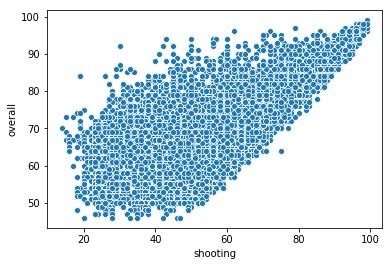

In [111]:
sns.scatterplot(x = "shooting", y = "overall", data = data)

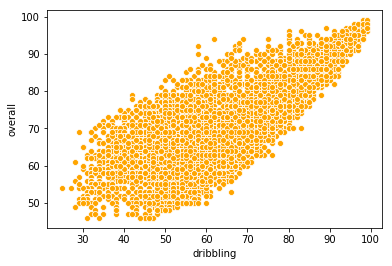

In [113]:
sns.scatterplot(x = "dribbling", y = "overall", data = data, color = 'orange')

### Comment:
* It appears that skill rating variables like shooting or dribbling have strong linear relationship with overall rating. We should include these variables in the model.

# Regression Model

In [17]:
newdata = data.loc[:,'overall':'phys_aggression']
newdata.shape

(21561, 46)

In [18]:
newdata.columns

Index(['overall', 'club', 'league', 'nationality', 'position', 'age',
       'date_of_birth', 'height', 'weight', 'intl_rep', 'added_date', 'pace',
       'pace_acceleration', 'pace_sprint_speed', 'dribbling', 'drib_agility',
       'drib_balance', 'drib_reactions', 'drib_ball_control', 'drib_dribbling',
       'drib_composure', 'shooting', 'shoot_positioning', 'shoot_finishing',
       'shoot_shot_power', 'shoot_long_shots', 'shoot_volleys',
       'shoot_penalties', 'passing', 'pass_vision', 'pass_crossing',
       'pass_free_kick', 'pass_short', 'pass_long', 'pass_curve', 'defending',
       'def_interceptions', 'def_heading', 'def_marking', 'def_stand_tackle',
       'def_slid_tackle', 'physicality', 'phys_jumping', 'phys_stamina',
       'phys_strength', 'phys_aggression'],
      dtype='object')

In [19]:
newdata = newdata.drop(['date_of_birth','added_date','club', 'league', 'nationality',
       'position'], axis = 1)
newdata.shape

(21561, 40)

In [20]:
newdata = newdata.apply(lambda i: i.fillna(np.mean(i)))
newdata.shape

(21561, 40)

In [21]:
y = newdata.overall
X = newdata.drop(['overall'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 1,stratify = y)

In [22]:
X_train.shape

(17248, 39)

(array([ 284., 1020., 2463., 6314., 5112., 3238., 1743.,  834.,  403.,
         150.]),
 array([46. , 51.3, 56.6, 61.9, 67.2, 72.5, 77.8, 83.1, 88.4, 93.7, 99. ]),
 <a list of 10 Patch objects>)

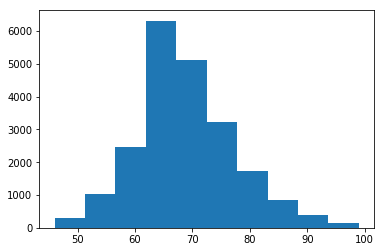

In [23]:
plt.hist(newdata.overall)

In [24]:
linear = linear_model.LinearRegression(fit_intercept = True)

In [25]:
newdata.shape

(21561, 40)

In [26]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
linear.score(X_test, y_test)

0.8777951663779782

In [28]:
cv = model_selection.ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv_linear = model_selection.cross_val_score(linear, X, y, cv = cv)

In [29]:
print(cv_linear)
print(np.mean(cv_linear))

[0.88946    0.88384806 0.87986843 0.88276967 0.87745702]
0.8826806351691108


In [30]:
linear.coef_

array([ 0.05079126,  0.01912894,  0.01837293,  1.42669585, -0.11050006,
        0.09536244,  0.09908283,  0.21137829, -0.01797197, -0.01917675,
        0.33633067,  0.08839208, -0.09367985,  0.06938559,  0.18012856,
       -0.07305183, -0.05517999, -0.01477847, -0.05461267, -0.01955036,
       -0.00743092, -0.07595401,  0.02400833,  0.01813949,  0.00686204,
        0.11019974,  0.00339882,  0.01023251,  0.14919681, -0.02558446,
        0.04490096, -0.0319005 , -0.02860514, -0.02583455, -0.01763437,
        0.01240234,  0.00974609,  0.05129529, -0.00351937])

0.03185930337701968


(array([6.000e+00, 6.100e+01, 4.260e+02, 1.854e+03, 1.563e+03, 3.420e+02,
        4.900e+01, 9.000e+00, 1.000e+00, 2.000e+00]),
 array([-13.6664042 , -10.18126822,  -6.69613223,  -3.21099625,
          0.27413974,   3.75927572,   7.24441171,  10.72954769,
         14.21468368,  17.69981966,  21.18495565]),
 <a list of 10 Patch objects>)

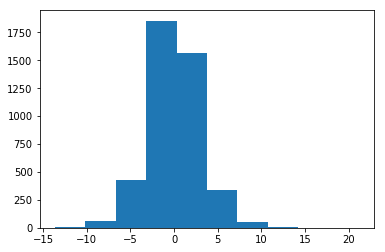

In [71]:
#Distribution of Residuals
residuals = y_test - linear.predict(X_test)
print(np.mean(residuals))
plt.hist(residuals)

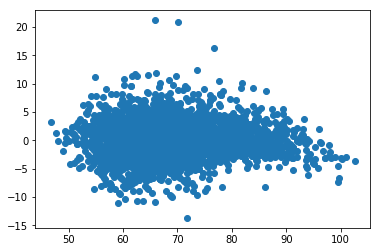

In [75]:
# Residual vs. Fitted
plt.plot(linear.predict(X_test), residuals, "o")

### Comments:
* The histogram of overall rating is quite normal, therefore, we try fitting linear regression model to the data.
* The residuals follows normal distribution with mean close to 0 (0.03) as shown in the histogram.
* The variance of residuals is considered to be constant, since there is no pattern in the Residuals vs. Fitted plot.
* We also do cross validation to test if it overfits the data.
* The score before and after doing cross validation is similar (0.878 vs. 0.8826), so it appears to be a good model. However, we will try Lasso method to check if we can eliminate some insignificant predictors.

# Using Lasso to shrink the model

In [31]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_l

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_l

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Text(0, 0.5, 'weights')

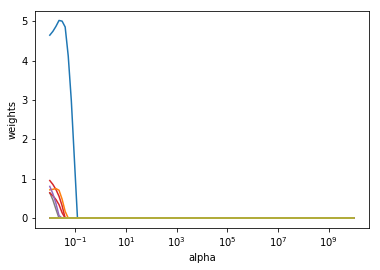

In [32]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [33]:
# Perform a 10 fold cross-validation to determine the alpha to use
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
# The best alpha to use:
lassocv.alpha_

5.80090466058627e-05

In [34]:
# Using this best alpha from cross-validation, we get the lowest testing MSE for LASSO
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

9.02704122872471

In [115]:
pd.Series(lasso.coef_, index=X.columns)

age                  0.051692
height               0.024863
weight               0.018604
intl_rep             1.459288
pace                -0.075469
pace_acceleration    0.078931
pace_sprint_speed    0.081557
dribbling            0.240553
drib_agility        -0.015247
drib_balance        -0.020133
drib_reactions       0.343748
drib_ball_control    0.064394
drib_dribbling      -0.104076
drib_composure       0.069363
shooting             0.103100
shoot_positioning   -0.068650
shoot_finishing     -0.020931
shoot_shot_power    -0.000000
shoot_long_shots    -0.038022
shoot_volleys       -0.015015
shoot_penalties     -0.000801
passing              0.000000
pass_vision          0.011588
pass_crossing        0.000000
pass_free_kick       0.000000
pass_short           0.081184
pass_long           -0.000000
pass_curve           0.003279
defending            0.068764
def_interceptions   -0.008870
def_heading          0.044899
def_marking         -0.007668
def_stand_tackle    -0.006615
def_slid_t

### Comments: PLEASE ADD COMMENTS HERE